<a href="https://colab.research.google.com/github/pofuoku/courses/blob/master/prince_AI4drug_discovery.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning for Drug Repurposing**
**_Prince Ofuoku_**<br>
**_MSc Bioinformatics_**
<br>
## **Introduction**
Drug discovery is a very long and expensive process. It can take over 10 years and about 3 billion dollars to indentify a novel drug ([_Urbina et al, 2021_](https://www.sciencedirect.com/science/article/pii/S1367593121000818#bib3)). To compound the situation, majority of drugs end up failing clinical trials. In addition, some drugs end up being withdrawn from the market after being approved. <br><br>
Drug repurposing (repositioning or reprofiling) is finding a new clinical indication for a drug that has already been approved for some other indications. This markedly reduces the duration and cost of investment; as a result, drug repurposing is growing in popularity ([_Baker et al, 2018_](https://www.sciencedirect.com/science/article/pii/S1359644617302878?casa_token=QXXaRqncoSAAAAAA:Mn_QAhscm1a5H0SZ19eH9rYZHvRxQxnc4RgtlljzQDFqqnRJFVj5xJFujnczyl3VBw1QNtXxGw)). Over 60% of drugs have been tried on more than one disease with varying successes. Examples of drugs that have been successfuly repurposed include:
- **Bupropion**: originally used for depression, but was repurposed for smoking cessation.
- **Thalidomide**: once a treatment for morning sickness, is now used for multiple myeloma and leprosy.
- **Sidenefil**: initialy approved for angina, but is currently being used for erectile dysfunction.

I found this article highly informative. [_A bibliometric review of drug repurposing._](https://www.sciencedirect.com/science/article/pii/S1359644617302878?casa_token=QXXaRqncoSAAAAAA:Mn_QAhscm1a5H0SZ19eH9rYZHvRxQxnc4RgtlljzQDFqqnRJFVj5xJFujnczyl3VBw1QNtXxGw)<br><br>
Machine Learning aims to speed up drug repurposing process, taking advatange of the recent upturn in data. There are various proposed methodologies in computational discovery, deep learning being one of the most successful and thus the recent trend. The workflow of a computational approach can be roughly summarized in four steps ([_Pan et al, 2022_](https://wires.onlinelibrary.wiley.com/doi/abs/10.1002/wcms.1597)).<br>
1. Getting data from reliable sources. Fortunatley, there are tons of databases with information about chemistry, activities of drug-like compounds, and their respective interactions with proteins or targets. They also report useful metrics to quantify their activities such as the binding affinity between a drug and a target, potency of inhibition and so on.
2. Representing a molecule as a feature vector, which can be used for computation; a process called featurization.
3. Training a model on the features generated above. 
4. Predicting bioactivites of novel compounds based on the features learned from the training above.<br><br>

In this notebook, I will go through similar steps using the bioactivity data of **Acetylcholinesterase (ACh)**, one of the therapeatic targets in Alzheimer's disease, as an example. The rest of the notebook will be divided as follows:<br>
- Getting Data
- Cleaning Data
- Featurization
- Building models
- Evaluating performace of models
- Final thoughts/Conclusion<br>.  

I will use the following tools/packages:
- Chembl client
- Pandas
- Tensowflow
- Sci-kit Learn
- Deepchem
- Matplotlib

---
## **Getting Data**
Common databases used in computaional drug discovery include:
- [*BindingDB*](http://www.bindingdb.org/bind): A public database of protein-ligand binding affinities.
- [*ChEMBL*](https://www.ebi.ac.uk/chembl/): A manually curated database of over 2 million bioactive molecules with drug-like properties.
- [*DrugBank*](http://www.drugbank.ca): It combines drug data (i.e., chemical,pharmacological and pharmaceutical) information with drug target information (i.e., sequence, structure and pathway).
- [*GeneCards*](https://www.genecards.org): It automatically integrates gene-centric data from 150 web sources, including  genomic, transcriptomic, proteomic, genetic, clinical and functional information. 


Among others ([_Pan et al, 2022_](https://wires.onlinelibrary.wiley.com/doi/abs/10.1002/wcms.1597)).


ChEMBL has an API that can be used to retrieve data from its database. First step is to install the package, `chemb_webresourse_client`.

In [ ]:
! pip install chembl_webresource_client

The `new_client` module contains methods needed for our query. In addition, we need `pandas` to work with the resulting dataframe.

In [ ]:
import pandas as pd
from chembl_webresource_client.new_client import new_client

#### Search for target protein

- The following codes search for the keyword '*acetylcholinesterase*' in the ChEML database, save the returned query in a pandas dataframe, and display the first five results.

In [ ]:
target = new_client.target
target_query = target.search('acetylcholinesterase')
targets = pd.DataFrame.from_dict(target_query)
targets.head()

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'P22303', 'xref_name': None, 'xre...",Homo sapiens,Acetylcholinesterase,27.0,False,CHEMBL220,"[{'accession': 'P22303', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Cholinesterases; ACHE & BCHE,27.0,False,CHEMBL2095233,"[{'accession': 'P06276', 'component_descriptio...",SELECTIVITY GROUP,9606
2,[],Drosophila melanogaster,Acetylcholinesterase,17.0,False,CHEMBL2242744,"[{'accession': 'P07140', 'component_descriptio...",SINGLE PROTEIN,7227
3,"[{'xref_id': 'P04058', 'xref_name': None, 'xre...",Torpedo californica,Acetylcholinesterase,15.0,False,CHEMBL4780,"[{'accession': 'P04058', 'component_descriptio...",SINGLE PROTEIN,7787
4,"[{'xref_id': 'P21836', 'xref_name': None, 'xre...",Mus musculus,Acetylcholinesterase,15.0,False,CHEMBL3198,"[{'accession': 'P21836', 'component_descriptio...",SINGLE PROTEIN,10090


- The search returns results from different species but we are interested in Humans; first row ie index 0. The column `target_chembl_id` contains unique IDs for each drug traget. The next line of code assign the ID of interest to a variable `target`.

In [ ]:
target = targets.target_chembl_id[0]
target

'CHEMBL220'

- We access all bioactivity data using the `.activity` attribute
- Then filter for the target chembl ID and only rows with IC$_{50}$ values. The database has other similar metrics.<br>

#### What is IC$_{50}$?

The IC$_{50}$, Half-maximal inhibitory concentration, is the most widely used metric of a drug's efficacy. It indicates how much drug is needed to inhibit a biological process by 50%, thus providing a measure of potency of an antagonist drug in pharmacological research.It is usually meassured in nM (nanomolar) unit ([*Aykul et al, 2016*](https://pubmed.ncbi.nlm.nih.gov/27365221/#:~:text=Half%2Dmaximal%20inhibitory%20concentration%20(IC50,antagonist%20drug%20in%20pharmacological%20research.))).

In [ ]:
activity = new_client.activity
result = activity.filter(target_chembl_id=target).filter(standard_type="IC50")
df = pd.DataFrame.from_dict(result)
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,33969,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.75
1,None,37563,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.1
2,None,37565,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,50.0
3,None,38902,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.3
4,None,41170,[],CHEMBL643384,Inhibitory concentration against acetylcholine...,B,None,None,BAO_0000190,BAO_0000357,...,Homo sapiens,Acetylcholinesterase,9606,None,None,IC50,uM,UO_0000065,None,0.8


## **Data Wrangling**
- The dataframe has 45 columns but only interested in 3 columns namely ; `molecule_chembl_id`, `canonical_smiles`, and `standard_value`.

In [ ]:
cols = ['molecule_chembl_id', 'canonical_smiles', 'standard_value']
df = df[cols]
df.head()

,molecule_chembl_id,canonical_smiles,standard_value
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0


- Check for missing values

In [ ]:
df.isnull().sum()

molecule_chembl_id       0
canonical_smiles        35
standard_value        1256
dtype: int64

- As shown above, there are two columns with null values.
- `dropna()` drops all rows with missing values.
- `inplace=True` indicates that we want to modify `df`, otherwise, we would have assigned it to a new variable.

In [ ]:
df.dropna(inplace=True)

- Check for duplicates by
- first, getting the dimension of df

In [ ]:
df.shape

(6947, 3)

- then, checking the number of unique rows

In [ ]:
len(df.molecule_chembl_id.unique())

5665

In [ ]:
len(df.canonical_smiles.unique())

5664

- The number of unique rows is less than number of total rows suggesting we have duplicate values.
- the `drop_duplicates()` method drops all duplicate rows

In [ ]:
df = df.drop_duplicates(subset=['molecule_chembl_id', 'canonical_smiles'])

- get shape again for sanity check

In [ ]:
df.shape

(5665, 3)

- After dropping rows, the indexes are now altered. `reset_index()` reorder them.

In [ ]:
df = df.reset_index(drop=True)

- From the data so far, the most obvious machine learning task will be to predict the standard value (IC50), which will be a regression model since the column contain continous data.
- However, the task can be simplified into a binary classification, namely, if a drug is active against the target or not. This might be more useful for our drug discovery goal(my opinion)??.
- But first, we need to add such a categorical column to the df. And a set a cutoff value to separate active from inactive compound. (Not sure of the best cutoff???)
- I consider compounds having values of less than 1000 nM to be **active** and the rest, **inactive**. 

In [ ]:
df['bioactivity'] = df['standard_value'].apply(lambda x: 'active' if float(x) <= 1000 else 'inactive')
df.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,750.0,active
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,100.0,active
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,50000.0,inactive
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,300.0,active
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,800.0,active


- One more sanity check to make sure there're no missing values and codes worked as intended so far.

In [ ]:
df.isnull().sum()

molecule_chembl_id    0
canonical_smiles      0
standard_value        0
bioactivity           0
dtype: int64

- Take a look at the distribution of `standard_value` (IC50)

In [ ]:
df.standard_value.describe()

count    5.665000e+03
mean     2.661134e+12
std      1.083006e+14
min      0.000000e+00
25%      1.430000e+02
50%      2.360000e+03
75%      1.700000e+04
max      5.888437e+15
Name: standard_value, dtype: float64

- The range of values are too wide apart. Machine learning models perform better on small scales. This can be fixed by taking the -log10(IC50) in Molars. The resulting value is known as the [**pIC50**](https://www.collaborativedrug.com/what-is-pic50-2/#:~:text=Simply%20stated%2C%20pIC50%20is%20the,is%20a%20pIC50%20of%209.).
-  since **IC50** is given in nM, it is coverted to M by multiplying by 10^-9.
- In addition, values > 10^8 will be fixed at 10^8 otherwise the -log10 will return a negative value,
- lastly, 1 will be added to all values to avoid computing log0 and returning NaN. The value 1 is insignificant on a logorithmic scale.

In [ ]:
df["standard_value"] = df["standard_value"].apply(lambda x: 100000000 if x > 100000000 else x + 1)
df.standard_value.describe()

count    5.665000e+03
mean     2.858802e+05
std      4.300859e+06
min      1.000000e+00
25%      1.440000e+02
50%      2.361000e+03
75%      1.700100e+04
max      1.000000e+08
Name: standard_value, dtype: float64

In [ ]:
import numpy as np
df["pIC50"] = df["standard_value"].apply(lambda x: -np.log10(x * (10**-9)))
df.pIC50.describe()

count    5665.000000
mean        5.777927
std         1.467853
min         1.000000
25%         4.769526
50%         5.626904
75%         6.841638
max         9.000000
Name: pIC50, dtype: float64

- Map Bioactivity into 1 and 0 since machine learning algorithms understand only numbers.

In [ ]:
df["bioactivity"] = df["bioactivity"].map({"active":1, "inactive":0})

- No need to keep the `standard_value` column. I'm happy to drop it. `bioactivity` and `pIC50` are the targets for classification and regression models respectively.

In [ ]:
df.drop('standard_value', axis = 1, inplace=True)
df.head()

,molecule_chembl_id,canonical_smiles,bioactivity,pIC50
0,CHEMBL133897,CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1,1,6.124360
1,CHEMBL336398,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC1CC1,1,6.995679
2,CHEMBL131588,CN(C(=O)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F)c1ccccc1,0,4.301021
3,CHEMBL130628,O=C(N1CCCCC1)n1nc(-c2ccc(Cl)cc2)nc1SCC(F)(F)F,1,6.521434
4,CHEMBL130478,CSc1nc(-c2ccc(OC(F)(F)F)cc2)nn1C(=O)N(C)C,1,6.096367


- Visualize the frequency distribution of the **bioactivity** category to decide how the dataset will be splitted before training in order to aviod a train/test imbalance.

Text(0, 0.5, 'Frequency')

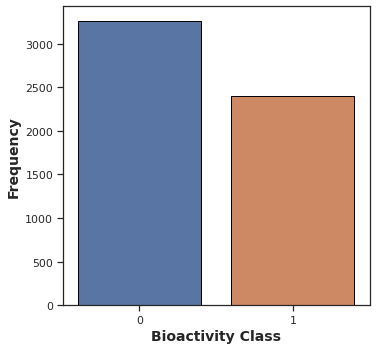

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style='ticks')
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity', data=df, edgecolor='black')

plt.xlabel('Bioactivity Class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

- Its not exactly evenly distruted but it's not too way off either, so a simple random split should be suitable; however, I will implement a special split method as will be seen later.
- The dataset is cleaned and ready to trained.
- The line of code below save the dataset with the name **"Bioactivity_cleaned.csv"**, which is available as supplematary data to this notebook.

In [ ]:
df.to_csv('Bioactivity_cleaned.csv',index = False)

## **Featurization**
Models can only be trained with numerical inputs but so far, we've seen the molecules being represented just as **SMILES strings**. SMILES (simplified molecular-input line-entry system) is a method of encoding molecular structures to text format and they are unique for each compound. <br>
Featurization, in turn, coverts these unique strings to numeric vectors, whereby each element of such vector represent the property of an atom or a chemical bond.<br>
I'll quickly give an illustration.

In [ ]:
import pandas as pd

df = pd.read_csv('Bioactivity_cleaned.csv')

- The column `canonical_smiles` contains the said SMILES string. I'll use the first five values for my illustration.

In [ ]:
smiles = df.canonical_smiles[:5]
print(type(smiles[0]))
print(smiles[0])

<class 'str'>
CCOc1nn(-c2cccc(OCc3ccccc3)c2)c(=O)o1


- we can see that it is just a string object. 

#### Install Packages for Computational Chemistry
[RDKit](https://www.rdkit.org/) and [DeepChem](https://deepchem.io/) have lots of useful functions for working with compounds. RDkit is automatically installed along with Deepchem.

In [ ]:
! pip install deepchem

     |████████████████████████████████| 608 kB 7.8 MB/s 
     |████████████████████████████████| 22.3 MB 1.3 MB/s 


In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw

- RDKit has the `.MolFromSmiles()` method which decodes SMILES strings to molecular objects.

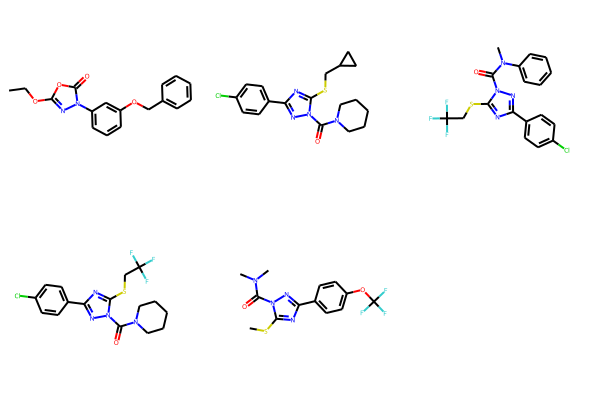

In [ ]:
molecules = [Chem.MolFromSmiles(smile) for smile in smiles]
Draw.MolsToGridImage(molecules)

- Next, each of these molecules need to be converted into features or molecular fingerprints.
- There are several methods of doing this, and DeepChem has classes dedicated to each.  Details are in this deepchem [tutorial](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Going_Deeper_on_Molecular_Featurizations.ipynb), which I found useful.
- One of them is the "Extended Connectivity Fingerprint" (ECFP) or Circular Fingerprints.
- The ECFP algorithm classifies atoms based on their properties and bonds. For example, "a carbon atom bonded to two heavy atoms" could be a feature, and a particular element of the fingerprint is set to 1 for any molecule that contains that feature or 0 if it doesn't.
- To illustrate, we first need to create an instance of `CircularFingerprint()`
- Molecules varies in sizes and number of atoms, so to maintain a uniform length for all features, we specify a desired size. 


In [ ]:
import deepchem as dc

featurizer = dc.feat.CircularFingerprint(size=1024)

- let's see how it works on a dummy molecule

In [ ]:
feature_vector = featurizer("CCO")
print(feature_vector)

[[0. 0. 0. ... 0. 0. 0.]]


- It returns an array of floats unique for "CCO"
- let's confirm the size

In [ ]:
feature_vector.size

1024

- All sizes are fixed regardless of the length of the molecule
- Let's see one more example with the first five SMILES

In [ ]:
featurizer(smiles)

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

- Now! we are ready to begin machine learning proper.

## **Regression Models**
The task in this section is to predict the "pIC50" of a compound from its molecular structure.<br>
#### **Load Dataset**
For this task, the target, y, is `pIC50` and the features , X, is the "featurized version" of the column `canonical_smiles`. 
- The codes below apply the featurizer, earlier described, on `canonical_smiles` and return a special deepchem object which is equivalent to the array in the earlier example.

In [ ]:
loader = dc.data.CSVLoader(tasks = ["pIC50"],
                           feature_field = "canonical_smiles", 
                           featurizer = featurizer)

dataset = loader.create_dataset('Bioactivity_cleaned.csv')

dataset

<DiskDataset X.shape: (5665, 1024), y.shape: (5665, 1), w.shape: (5665, 1), task_names: ['pIC50']>

#### **Split Dataset**
In Machine Learning, we try to aviod two problems during split;
- **Train/Test Imbalance**: This happens when the dataset contains disproportionate number of class labels. For example, consider a dataset with 100 examples and two class labels, say 'positive' (with 90 examples) and 'negative' (with 10 examples). If we split this dataset randomly into train and test set, we could end up with no 'negative' examples in the test set and thus, unsuitable for evaluation.
- **Data Leakage**: A dataset may have a subset of examples with similar features by chance and if this is not addressed during splitting, we could end up having a train and test dataset with similar example. Consequently, the model would learn such features from the train set and perform very well when be evaulated on the test test, since it has seen those features before -- a type of Leakage known as **Train-test contamination**. However, the model will perform poorly when deployed to predict new dataset.

DeepChem has different in built splitters that addressed these problems. I opted for the ScaffoldSplitter. Details about the available options and source codes can be found on the [official documentaion](https://deepchem.readthedocs.io/en/latest/api_reference/splitters.html#scaffoldsplitter).
##### **ScaffoldSplitter**
This splitter identifies molecules based on the [Bemis-Murcko scaffold algorithm](https://docs.chemaxon.com/display/docs/bemis-murcko-clustering.md), and ensures that all molecules with the same scaffold are put into the same dataset.
- It returns three datasets: train, valid and test with a 80/10/10 percent split respectively.

In [ ]:
splitter = dc.splits.ScaffoldSplitter()
train, valid, test = splitter.train_valid_test_split(dataset)

#### **Normalization**
Normalization is a standard step in all Machine Learning methods.The aim is to put all data points in the same scale, so that features on larger scale do not contribute more weights than others. There are various standardization methods available in **Scikit-learn** package under the **`StandardScaler`** submodule. DeepChem has a method `NormalizationTransformer` for same purpose. In addition, we can decide to customized our own scaler; however, I opt to use the built-in deepchem method. Normalization works by setting the mean of the data to zero and standard deviation (sd) to 1. It is given by this equation:<br><br>
$$X_(scaled) = \frac{X - mean}{sd}$$
<br>
In Machine Learning, the following are best practice when standardizing.
1. Normalize after splitting datasets.
2. We use the mean and sd of the train set. This is done by fitting the train set to an instance of the 'normalization' class, which varies by name depends on the package of choice.
3. Then we transform the sub-datasets (ie train, valid, test) using the "fitted object" above. In addition, new dataset will undergo the same transformation before being fed to the model for prediction.

In [ ]:
transformers = [dc.trans.NormalizationTransformer(transform_y=True, dataset=train)]
for dataset in [train, valid, test]:
  for transformer in transformers:
      dataset = transformer.transform(dataset)

#### **Training Models**
- In this section, I will build and compare different regression models begining with random forest from `sklearn`.<br>

##### **Random Forest Regressor** 




In [7]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=1)
model = dc.models.SklearnModel(rf)
model.fit(train)

##### **Evaluate Model**
The deepchem `Metric` module has different evaluation metrics. The choice of metric depends on largely on task (eg regression vs classification) and to some extend personal preference. Metric suitable for evaluating regression models include, mean absolute error, root mean sqaure error, R-squared among others.<br>
For simplicity, I will use the R-squared, also known as the pearson correlation. It is easy to interprete, with values rannging from 0 to 1. 1 being a perfect model.

In [8]:
from deepchem.utils.evaluate import Evaluator

metric = dc.metrics.Metric(dc.metrics.r2_score)
evaluator = Evaluator(model, valid, transformers)
rf_score = evaluator.compute_model_performance([metric])["r2_score"]

print(f"R_squared of Random Forest Model is {round(rf_score, 2)}")

R_squared of Random Forest Model is 0.44


- 0.44 is not a good score. 
- Let's try to improve on that by fine tunning some hyperparameters.

##### **Hyperparameters Tunning**
The `GridHyperparamOpt` class, which is similar to sklearn's Gridsearch, enables us to try various hyperparameters in a few lines of code. We can tune as many as we want but I will consider only two parameters.
- **n_estimators**: Random Forest is an ensemble of several decision trees. The `n_estimators` indicates the number of trees we want the algorithm to use. Generally, random forest perfom better with increasing number of trees but that is not always the case. The only way to find out is trying different options. I randomly chose some low and high numbers below.
- **max_features**: This is the number of features the algorithm will consider when looking for the best split at each decision node. The default value is "auto". I prefer to try all four available options. More information on the sklearn documentation.

Notice I created a model_builder function; this is because `GridHyperparamOpt()` expects a "callable" object.<br>
In addition, ****** makes the function flexible to accept any number of key word arguments **(kwargs)**.

In [10]:
params = {
    "n_estimators": [5, 10, 50, 100, 150, 200],
    "max_features": ["auto", "sqrt", "log2", None]}


def model_builder(**model_params):
  n_estimators = model_params['n_estimators']
  max_features = model_params['max_features']
  rf = RandomForestRegressor(n_estimators=n_estimators, max_features=max_features)
  return dc.models.SklearnModel(rf)


optimizer = dc.hyper.GridHyperparamOpt(model_builder)
metric = dc.metrics.Metric(dc.metrics.r2_score)
best_model, best_hyperparams, all_results = optimizer.hyperparam_search(
    params, train, valid, metric, transformers)

- It returns the best model, best hyperparameters and all results based on their performance on the valid_dataset.
- Let's take a look at the best performing hyperparameters

In [13]:
best_hyperparams

{'max_features': 'sqrt', 'n_estimators': 100}

- Now let's evaluate the performance of best model on the test dataset

In [12]:
test_evaluator = Evaluator(best_model, test, transformers)
RF_test_score = test_evaluator.compute_model_performance([metric])['r2_score']
round(RF_test_score, 2)

0.55

#### **Deep Neural Network**
Below is a deepnet with four dense layers.<br>
I opted for hidden layers with 1024, 500 and 500 nodes respectively after playing around with a few. And each with a 'relu' activation function.<br>
I also added a dropout of 0.3. Dropout acts like a regularization by randomly dropping some node signals (in this case 30%) before passing them to the next layer.<br>
BatchNormalization works the way as the normalization earlier described; In this case, it normalizes the output from each hidden layer before sending them as input to the next layer.

In [17]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[train.X.shape[1]]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

model = dc.models.KerasModel(model, dc.models.losses.L2Loss())

model.fit(train, nb_epoch=50)
metric = dc.metrics.Metric(dc.metrics.pearson_r2_score)
DNN_train_score = model.evaluate(train, [metric])['pearson_r2_score']
DNN_test_score = model.evaluate(test, [metric])['pearson_r2_score']
print('training set score:', round(DNN_train_score, 2))
print('test set score:', round(DNN_test_score, 2))

training set score: 0.96
test set score: 0.6


In [6]:
DNN_train_score = 0.96
DNN_test_score = 0.6

- The training score is almost excellent, however, the model performed lower on the test set. This is known as **overfitting.** This is a common problem in Machine Learning; here, the model learns irrelevant features from the train set which can not be generalize.
- One way of adressing overfitting is by implementing early stopping.
- Early stopping works by evaluating the performance of both the train and valid set in realtime. Then it terminates training immediately the valid score stops improving.

##### **Implementing Early Stopping**
The model is same as above but we add a callback this time and pass the valid dataset as an argument. In addition, we how often we want to evaluate performance. In this case, we evalaute after every 500 training steps.

In [23]:
model = keras.Sequential([
    layers.Dense(1024, activation='relu', input_shape=[train.X.shape[1]]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(500, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

model = dc.models.KerasModel(model, dc.models.losses.L2Loss())

callback = dc.models.ValidationCallback(valid, 500, metric)

model.fit(train, nb_epoch=50, callbacks=callback)

DNN_train_score1 = model.evaluate(train, [metric])['pearson_r2_score']
DNN_test_score1 = model.evaluate(test, [metric])['pearson_r2_score']
print('training set score:', round(DNN_train_score1, 2))
print('test set score:', round(DNN_test_score1, 2))

Step 500 validation: pearson_r2_score=0.424965
Step 1000 validation: pearson_r2_score=0.434093
Step 1500 validation: pearson_r2_score=0.439724
Step 2000 validation: pearson_r2_score=0.458065
training set score: 0.95
test set score: 0.6


- Early stopping did not help in this case. 
- The model needs more tweaks.

## **Classification Models**
In this section, I will try various classication models. The steps remain the same. Only changes are:
- **bioactivity** is the target column this time around. Recall, it has two levels -- "active" and "inactive". So it is a binary classification task.
- the appropriate evaluation metric for a binary classification is the **accuracy score**.


#### **Random Forest Classifier**

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# load dataset
dataset_file = 'Bioactivity_cleaned.csv'
loader = dc.data.CSVLoader(tasks = ["bioactivity"],
                           feature_field = "canonical_smiles", 
                           featurizer = featurizer)
dataset = loader.create_dataset(dataset_file)


#split dataset
splitter = dc.splits.ScaffoldSplitter()
train, valid, test = splitter.train_valid_test_split(dataset)


#normalize dataset
transformers = [
    dc.trans.NormalizationTransformer(transform_y=True, dataset=train)]
for dataset in [train, valid, test]:
  for transformer in transformers:
      dataset = transformer.transform(dataset)

#define appropriate metric
metric = dc.metrics.Metric(dc.metrics.accuracy_score)


#define hyperparameters
params = {
    "n_estimators": [5, 10, 50, 100, 150, 200],
    "max_features": ["auto", "sqrt", "log2", None],
    }

#build model
def model_builder(**model_params):
  n_estimators = model_params['n_estimators']
  max_features = model_params['max_features']
  rf = RandomForestClassifier(n_estimators=n_estimators, max_features=max_features)
  return dc.models.SklearnModel(rf)

optimizer = dc.hyper.GridHyperparamOpt(model_builder)
best_model, best_hyperparams, all_results = optimizer.hyperparam_search(
    params, train, valid, metric, transformers)

In [25]:
all_results

{'_max_featuresNone_n_estimators_10': 0.676678445229682,
 '_max_featuresNone_n_estimators_100': 0.6590106007067138,
 '_max_featuresNone_n_estimators_150': 0.6484098939929329,
 '_max_featuresNone_n_estimators_200': 0.6590106007067138,
 '_max_featuresNone_n_estimators_5': 0.6148409893992933,
 '_max_featuresNone_n_estimators_50': 0.657243816254417,
 '_max_featuresauto_n_estimators_10': 0.6802120141342756,
 '_max_featuresauto_n_estimators_100': 0.666077738515901,
 '_max_featuresauto_n_estimators_150': 0.666077738515901,
 '_max_featuresauto_n_estimators_200': 0.6643109540636042,
 '_max_featuresauto_n_estimators_5': 0.657243816254417,
 '_max_featuresauto_n_estimators_50': 0.6837455830388692,
 '_max_featureslog2_n_estimators_10': 0.6943462897526502,
 '_max_featureslog2_n_estimators_100': 0.6713780918727915,
 '_max_featureslog2_n_estimators_150': 0.6696113074204947,
 '_max_featureslog2_n_estimators_200': 0.6784452296819788,
 '_max_featureslog2_n_estimators_5': 0.657243816254417,
 '_max_feature

- max_fearures = log2 and n_estimators = 10 has the highest valid accuracy score

In [26]:
RFC_score_valid = all_results['_max_featuressqrt_n_estimators_10']
round(RFC_score_valid, 2)

0.7

- Let's evaluate on test set


In [31]:
test_evaluator = Evaluator(best_model, test, transformers)
RFC_test_score = test_evaluator.compute_model_performance([metric])["accuracy_score"]
round(RFC_test_score,2)

0.52

####**Logistic Regression**

In [35]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200, random_state=0)
model = dc.models.SklearnModel(lr)
model.fit(train)

evaluator = Evaluator(model, test, transformers)
LR_test_score = evaluator.compute_model_performance([metric])["accuracy_score"]

round(LR_test_score, 2)

0.47

#### **Deep Network Classifier**
- Lets try a classification using a simple deep net with just 2 layers.

I adapted Codes from the official [deepChem tutorials]( https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Creating_Models_with_TensorFlow_and_PyTorch.ipynb).

In [37]:
import tensorflow as tf

class ClassificationModel(tf.keras.Model):
    
    def __init__(self):
        super(ClassificationModel, self).__init__()
        self.dense1 = tf.keras.layers.Dense(1000, activation='relu')
        self.dense2 = tf.keras.layers.Dense(1)

    def call(self, inputs, training=False):
        y = self.dense1(inputs)
        if training:
            y = tf.nn.dropout(y, 0.5)
        logits = self.dense2(y)
        output = tf.nn.sigmoid(logits)
        return output, logits

keras_model = ClassificationModel()
output_types = ['prediction', 'loss']
model = dc.models.KerasModel(keras_model, dc.models.losses.SigmoidCrossEntropy(), output_types=output_types)

model.fit(train, nb_epoch=100)

DN_Class_train = model.evaluate(train, [metric])['accuracy_score']
DN_Class_valid = model.evaluate(valid, [metric])['accuracy_score']
print('training set score:', round(DN_Class_train, 2))
print('valid set score:', round(DN_Class_test, 2))

training set score: 0.99
valid set score: 0.76


- evaluate on test set

In [39]:
DN_Class_test = model.evaluate(test, [metric])['accuracy_score']
print('test set score:', round(DN_Class_test, 2))

test set score: 0.79


## **Graph Convolutions**
So far, we used the ECFP featurizer. It represents molecules and interactions of atoms in 2D plane. Some information about molecules are lost in this type of represenation because atoms interacts in 3D planes in real molecules.<br><br>
Graph convolutions solves this by representing the 3D structures of molecules in form of a graph. This, in turn, allows us to built more complex networks similar to Convolutional Neural Networks (CNN) used in image processing.<br><br>
See my work on image classification using CNN, [here]().<br>
See [Graph Convolutions in DeepChem](https://github.com/deepchem/deepchem/blob/master/examples/tutorials/Introduction_to_Graph_Convolutions.ipynb)<br><br>
This paper is very enlightening on the subject: [Convolutional networks on graphs for learning molecular fingerprints](https://proceedings.neurips.cc/paper/2015/hash/f9be311e65d81a9ad8150a60844bb94c-Abstract.html).

ref 
Duvenaud, David K., et al. "Convolutional networks on graphs for 
         learning molecular fingerprints." Advances in neural information processing 
         systems. 2015.

- To build a GraphConv in Deepchem, we use the `ConvMolFeaturizer()` featurizer
- The other steps are similar to what we've done so far
- The `GraphConvModel()` is a deepchem's bulit in implementation of a graph convolution network. Under the hood, it consists of two convolution layers, each with a width of 64 and a dense layer with a width of 128. See the source codes in deepchem Github repository.
- In addition, I added a dropout of 0.2 to each layers.

In [ ]:
featurizer = dc.feat.ConvMolFeaturizer()
dataset_file = 'Bioactivity_cleaned.csv'

loader = dc.data.CSVLoader(tasks = ["bioactivity"],
                           feature_field = "canonical_smiles", 
                           featurizer = featurizer)
dataset = loader.create_dataset(dataset_file)

splitter = dc.splits.ScaffoldSplitter()
train, valid, test = splitter.train_valid_test_split(dataset)

transformers = [dc.trans.NormalizationTransformer(transform_y=True, dataset=train)]

for dataset in [train, valid, test]:
  for transformer in transformers:
      dataset = transformer.transform(dataset)
      
model = dc.models.GraphConvModel(1, dropout=0.2, mode='classification')
model.fit(train, nb_epoch=50)

In [43]:
GCN_train = model.evaluate(train, [metric])['accuracy_score']
GCN_valid = model.evaluate(valid, [metric])['accuracy_score']
print('training set score:', round(GCN_train, 2))
print('valid set score:', round(GCN_valid, 2))

training set score: 0.89
valid set score: 0.74


- let's try it on the test set

In [46]:
GCN_test = model.evaluate(test, [metric])['accuracy_score']
print('test set score:', round(GCN_test, 2))

test set score: 0.77


## **Summary of Results**

In [49]:
import pandas as pd

In [53]:
scores = [RF_test_score, DNN_test_score, RFC_test_score, LR_test_score, DN_Class_test, GCN_test]
model_name = ["Random Forest Regressor", "DeepNet_Regressor", "Random Forest Classifier", 
              "Logistic Regression", "DeepNet_Classifier", "Graph Convolution"]

table = dict(scores = scores, model_name = model_name)

result = pd.DataFrame(table)
result.set_index("model_name", inplace=True)
result["scores"] = result["scores"].apply(lambda x: round(x,2))
result

,scores
model_name,
Random Forest Regressor,0.55
DeepNet_Regressor,0.60
Random Forest Classifier,0.52
Logistic Regression,0.47
DeepNet_Classifier,0.79
Graph Convolution,0.77


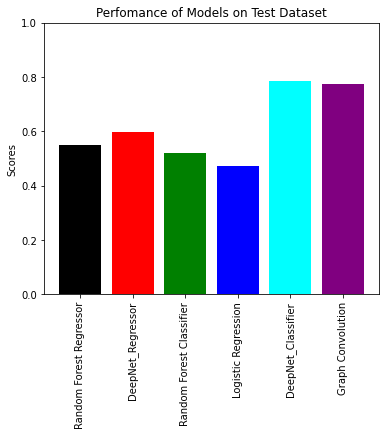

In [64]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize= (6, 5))
index = np.arange(len(scores))
colors = ['black', 'red', 'green', 'blue', 'cyan', 'purple']
plt.bar(index, scores, color=colors)

plt.title('Perfomance of Models on Test Dataset')
plt.ylabel('Scores')
plt.xticks(index, model_name, rotation=90)
plt.ylim(0,1)

plt.show()


- Let's take a closer look at the performance of the deep learning models.

In [15]:
Train = [DNN_train_score, DN_Class_train, GCN_train]
Test = [DNN_test_score, DN_Class_test, GCN_test]
Model = ["DeepNet_Regressor", "DeepNet_Classifier", "Graph Convolution"]

table = dict(Train=Train, Test=Test, Model=Model)

result = pd.DataFrame(table)
result.set_index("Model", inplace=True)
result["Train"] = result["Train"].apply(lambda x: round(x,2))
result["Test"] = result["Test"].apply(lambda x: round(x,2))
result

,Train,Test
Model,,
DeepNet_Regressor,0.96,0.60
DeepNet_Classifier,0.99,0.79
Graph Convolution,0.89,0.77


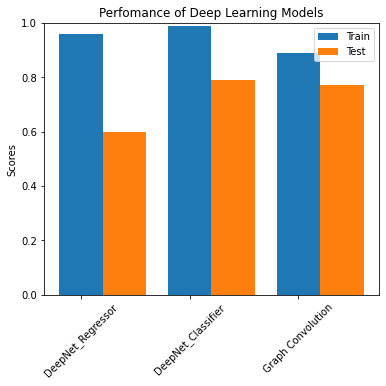

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize= (6, 5))
index = np.arange(len(Train))
plt.bar(index, Train, width=0.4, label="Train")
plt.bar(index + 0.4, Test, width=0.4, label="Test")

plt.title('Perfomance of Deep Learning Models')
plt.ylabel('Scores')
plt.xticks(index, Model, rotation=45)
plt.legend(loc="upper right")
plt.ylim(0,1)

plt.show()

## **Final Thoughts**
- An easy conclusion is that Deep Learning beats traditional Machine Learning models hands down.
- The Deep Learning models perfomed well generally; however, the performance on the test set can still be improved.

#### Adressing Overfitting
Overfiting is a major challenge especially in deep learning. Because of their complexity, they tend to learn complex (and sometimes irrelevant) features from the training set, which can not be generalized. Overfitting can be dealt with in any of the following ways:
- **Get more data**: As a rule of thumb, models perform better with more training examples. However, getting more data is difficult in computational chemistry; as data sources are largely from experiments which are expensive.
- **Improving models**: We can contine to tweak various hyperparameter until we improve performance; However, deep learning algorithms take a long time to converge, even on our modestly small sample size. So, time is a constrain. This can be adressed with increased in computer power. Generally, people or organizations with enormous computing power tend to do better in machine learning;
- **Data Augmentation** This is a technique used in image processing;whereby a training example is flip in various orientation to create more examples. I found this technique useful, when working with medical images, where some class labels do not have many examples. However, I am not sure, if this can apply with molecules (More research about this??)
- **Transfer Learning**: Another concept adapted from imaging and computer vision. The idea is to build a model on a pretrained model. Eg, ImageNet is, a model available on Tensowflow, a pretrained model for image classification. ChemBERTa, a pretrained model on deepchem,is based on similar idea. (More review on this.)

#### **Next Steps**
- Continue to improve model and settle for one.
- Deploy model for making predictions. The primary goal remain to make predictions from already approved drugs...


---
#### **References**
...